<a href="https://colab.research.google.com/github/matterxleben/NFL-Concussion-Prediction/blob/main/MSCI_446_ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MSCI 446 Project Report**

## Abhinav Sondhi (20879032), Matthew Erxleben (20889980), Jackson Porter (20858139)

#Introduction
The goal of this project is to build a model that predicts injuries in the NFL, specifically concussions. Concussions are a serious concern in the NFL, and can have long-term effects on a player’s health and wellbeing. By using data from past concussions and player specific details (including position, height, weight, etc.) our model can identify players who may be at higher risk for a concussion. This tool would allow teams and medical staff to take proactive measures to prevent injuries or provide early intervention.


# Data Description
The data that was used to teach, test, and build this model came from two major datasets. The first is historical NFL injury data that provided player name, date of injury and type of injury. For this model data from the start of 2010 to the end of 2017 was used. The second dataset that was used is player information/details. This consists of the player name, the position they play, the year they joined the NFL, their height and their weight. By mapping this data to the injury dataset we were able to build out a table that had player name, height, weight, years in the league, the position they play, and the number of concussions they’ve gotten in 1 year.

##Source of concussion data:
https://www.prosportstransactions.com/football/Search/SearchResults.php?Player=&Team=&BeginDate=&EndDate=&InjuriesChkBx=yes&submit=Search&start=3975

##Link to google sheets with concussion data mapped to player data in different formats:
https://docs.google.com/spreadsheets/d/1FLq48I_wo9NwxoCW0y2J9SXUvQ-qs3s7Umvo96RrajY/edit?usp=sharing

https://docs.google.com/spreadsheets/d/16_jvzaYAMFqVlaiYbg0EwBYJl8ggTD22IJqOqvtEv7M/edit?usp=sharing


The major issues that came up in this process were:

##Positions:
The goal was to use a regression model and it is possible to include categorical variables, but it isn’t very straightforward. We had to one-hot encode the data. However doing this wasn’t as simple as we’d intended as there were players that had multiple occurrences with sometimes different positions.

##Names:
This was a classic issue when getting data from multiple sources, the formatting does not line up perfectly resulting in small discrepancies. For example the concussion data had a player down as “• Sammie Lee Hill”, and the player details data set had “Hill, Sammie”. So going in and reformatting both of them to have the final be “Sammie Hill” took some string manipulation but also took a while to identify exactly what the issue was when trying to do the data mapping.

##Age vs years of experience:
This was a complication with feature engineering. The player detail data that was procured had the players’ date of birth, as well as the number of years they have been in the league. We chose to use the years in the league instead of age because just because a player is of a certain age doesn’t mean they are more prone to injury, however a player having more years in the league does. For example, if we look at two 22 year old players, one who is just drafted vs one who has been in the league for 3 years. The 3 years in the league has caused more “wear and tear” and that player is not in the same health as the rookie.

##How to use number of concussions in the most optimal way:
A big portion of this project was spent on feature engineering, actually going through the data that we acquired to gain an understanding of how to best model it. The focus of this was on what we would like to see as our output based on business case/value but also keeping in mind what the data actually represents and how we can best use it. The data on concussions were records with player name and the date the concussion occurred. This meant we had a couple of ways we could approach this. The first thing we tried was creating a feature for each year ( 2010, 2011 … 2017) and give it the value of the number of concussions the player had in that given year. The issue with this was this would almost counteract the years in the league as all the players that did not even play in a given year would have a concussion record of 0 for that year. This would heavily skew the data to have too many no concussion seasons.
The other option was to use a total career concussion count, so just adding all of the seasons together. This however would lead to no records of 0 concussions, which again does not depict the reality. We ended up deciding on setting up the feature to be the number of concussions in 1 season. Without specifying the year this would eliminate the excess “0 concussions” seasons while also allowing us to use the data of each player as multiple data points. This was an added benefit as we could use the few “good” player data points to represent each year of that player's career as its own data.

##Data integrity vs size
Once the data was formatted, cleaned, and mapped one of the problems that still needed to be dealt with was finding the perfect balance of enough data and clean data. After mapping the injury data to the player details there were varying degrees of quality with the data points. This was because of certain players having missing data. One of the biggest examples of this was, there is no data on positions for retired players. This means a lot of the data points can’t use that feature. So we created multiple different datasets going from “perfect” in terms of cleanliness, which was a lot smaller in size to a dataset that was very big in size providing many different situations to learn from, however had some missing data. This is further discussed when actually running the models.


## Imports

In [ ]:
# import the libraries we will use

# import pandas for convenient dataset manipulation
import pandas as pd
# import numpy for convenient work with arrays
import numpy as np
# import seaborn for advanced and convenient visualization
import seaborn as sns
# import matplotlib for basic visualization
import matplotlib.pyplot as plt
# import files for convenient file upload
from google.colab import files
# import linear regression model
from sklearn.linear_model import LinearRegression
# import random forest regressor model
from sklearn.ensemble import RandomForestRegressor
# import gradient boosting regressor model
from sklearn.ensemble import GradientBoostingRegressor
# import logistic regression model
from sklearn.linear_model import LogisticRegression
# import accuracy score to measure model accuracy
from sklearn.metrics import accuracy_score
# import train_test_split for convenient splitting
from sklearn.model_selection import train_test_split
# import mean squared error and r-squared to evaluate model performance
from sklearn.metrics import mean_squared_error, r2_score

# Import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier, plot_tree

from sklearn import metrics
from sklearn.metrics import classification_report

from sklearn.naive_bayes import GaussianNB

from IPython.display import display

from sklearn.preprocessing import OneHotEncoder

## Predicting Concussions in the NFL

### Load datasets and explore them

Dataset for linear regression, random forest regressor and gradient boosting regressor:

In [ ]:
# upload desired file
uploaded = files.upload()

# load the data into a pandas dataframe
for filename in uploaded.keys():
  data = pd.read_csv(filename)

# set unlimited columns
pd.set_option('display.max_columns', None)

# drop categorical data
data = data.drop(['Binary','Name','position', 'Years of Experience', 'Year'], axis=1)

# drop rows with NaN values in any column
data = data.dropna()

# print table
display(data.head())
display(data.shape)



Saving Cleaned up data - Sheet3.csv to Cleaned up data - Sheet3.csv


,Weight (lbs),Height (in),#OfConcussions,QB,LB,TE,CB,DB,OG,MLB,T,RB,OT,ILB,WR,OLB,G,SS,C,DE,FS,DT,NT,FB,SAF
0,176.0,68.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,176.0,68.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,176.0,68.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,176.0,68.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,176.0,68.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


(2312, 25)

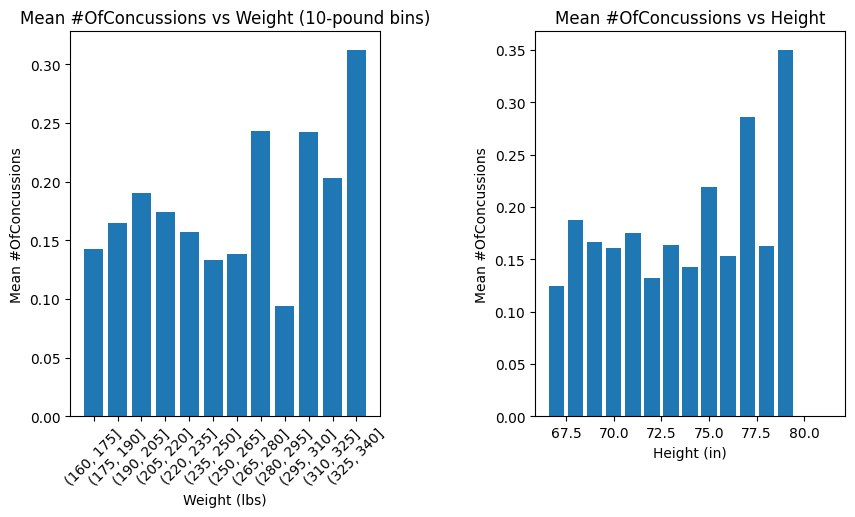

In [ ]:
# calculate the mean #OfConcussions for each unique combination of Weight and Height
concussions_by_weight = data.groupby('Weight (lbs)')['#OfConcussions'].mean()
concussions_by_height = data.groupby('Height (in)')['#OfConcussions'].mean()

# create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# group the weight values into bins of 10 pounds and calculate the mean #OfConcussions for each bin
weight_bins = np.arange(160, 350, 15)
concussions_by_weight_bin = data.groupby(pd.cut(data['Weight (lbs)'], weight_bins))['#OfConcussions'].mean()

# create a bar chart of the mean #OfConcussions for each weight bin
ax1.bar(np.arange(len(concussions_by_weight_bin)), concussions_by_weight_bin)
ax1.set_xticks(np.arange(len(concussions_by_weight_bin)))
ax1.set_xticklabels(concussions_by_weight_bin.index, rotation=45)
ax1.set_xlabel('Weight (lbs)')
ax1.set_ylabel('Mean #OfConcussions')
ax1.set_title('Mean #OfConcussions vs Weight (10-pound bins)')

# create a bar chart of the mean #OfConcussions for each height value in the second subplot
ax2.bar(concussions_by_height.index, concussions_by_height)
ax2.set_xlabel('Height (in)')
ax2.set_ylabel('Mean #OfConcussions')
ax2.set_title('Mean #OfConcussions vs Height')

# adjust spacing between subplots
fig.subplots_adjust(wspace=0.5)

# show the plot
plt.show()


As you can see, weight and height are not the most accurate features for predicting concussions as they vary greatly. Saying this, there is a slight upward trend for each.

Binary dataset for logistic regression:

In [ ]:
# for this model we use binary concussion data to determine whether or not a player will get a concussion in a given season.

# upload desired file
uploaded = files.upload()

# load the features into a pandas dataframe
for filename in uploaded.keys():
  data2 = pd.read_csv(filename)

# set unlimited columns
pd.set_option('display.max_columns', None)

# drop categorical data
data2 = data2.drop(['Name','position', 'Years of Experience', 'Year', '#OfConcussions'], axis=1)

# drop rows with NaN values in any column
data2 = data2.dropna()

# print table
data2.head()

Saving Cleaned up data - Sheet4.csv to Cleaned up data - Sheet4.csv


,Weight (lbs),Height (in),Binary,QB,LB,TE,CB,DB,OG,MLB,T,RB,OT,ILB,WR,OLB,G,SS,C,DE,FS,DT,NT,FB,SAF
0,304,78,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,304,78,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,304,78,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,321,77,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,321,77,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Machine Learning

In this section, we utilize mutliple machine learning algorithms on multiple different datasets in order to predict NFL concussions.

We first utilize 3 regression models to predict the number of concussions an NFL player will get in a season. We utlized regression to predict number of concussions a player will recieve because it is a continuos integer, therefore the player may get many concussions throughout the season and a regression model can predict that (versus classification models, whihc cannot). This was using a seperate dataset and we have set the column '#ofConcussions' as our continuos target variable. The three regression models we used are Linear Regression, Random Forest Regression, and Gradient Boost Regression.

The first regression model we looked at is Linear Regresssion:

### Linear Regression Model

In [ ]:
# split the data into input features (X) and target variable (y)
X = data.drop('#OfConcussions', axis=1)
y = data['#OfConcussions']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=81)

# create a linear regression model
model = LinearRegression()

# train the model on the training set
model.fit(X_train, y_train)

# make predictions on the testing set
y_pred = model.predict(X_test)

# calculate the mean squared error and R-squared values
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# print the results
print('Mean squared error: ', mse)
print('R-squared: ', r2)


Mean squared error:  0.31831555533034595
R-squared:  0.014115825113258484


As we can see, the Linear Regression model achieved a Mean squared error: 0.31831555533034595, and an R-squared:  0.014115825113258484

This is a very low R-squared. This means that our data we ouitlined as our features to this model only explains 1.4% pf the target variable. Our dependent variable 'Number of concussions' is not very well explained by our independent variables that we defined as features.

In [ ]:
# load the model's coefficients into a dataframe to see which features affect concussions the most
target_column = '#OfConcussions'
features = data.drop(columns=target_column)
pd.DataFrame(model.coef_, features.columns, columns=['Coeff'])

,Coeff
Weight (lbs),-0.000035
Height (in),0.003851
QB,-0.048345
LB,0.018797
TE,-0.026166
CB,0.029436
DB,-0.013695
OG,-0.064329
MLB,0.039309
T,0.097409


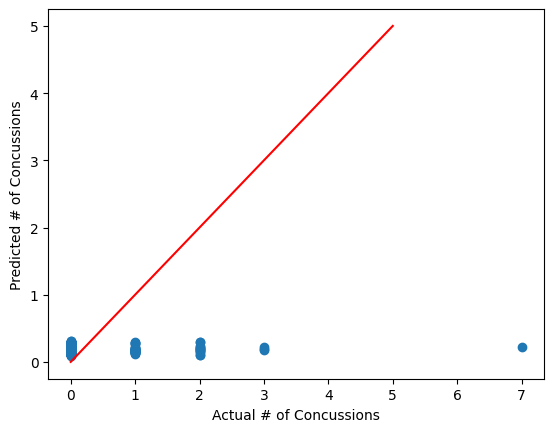

In [ ]:
# visualize the predictions vs grount truth
plt.scatter(y_test, y_pred)
plt.xlabel('Actual # of Concussions')
plt.ylabel('Predicted # of Concussions')
plt.plot(np.linspace(0,5,100), np.linspace(0,5,100), '-r')

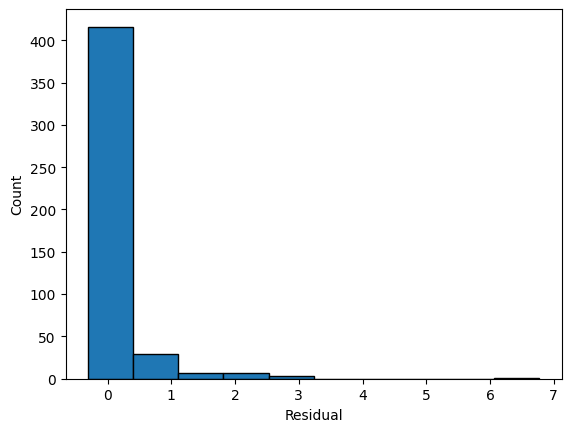

In [ ]:
# visualize the residuals
plt.hist(y_test - y_pred, edgecolor='black')
plt.ylabel("Count")
plt.xlabel("Residual")
plt.show()

As we can see, the Residuals for our Linear Regression model looks to be well centered around 0. However due to our data having an imbalenced number of 0's as the '#ofConcussions', this is mainly explaining where our model is predicting a 0 and the true value of concussions also being a 0. As we know 0-0=0, therefore we can a high amount of residuals at 0 on the plot.

### Random Forest Regressor

In [ ]:
# split the data into input features (X) and target variable (y)
X = data.drop('#OfConcussions', axis=1)
y = data['#OfConcussions']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=81)

# create a random forest regression model with 100 trees
model = RandomForestRegressor(n_estimators=100, random_state=81)

# train the model on the training set
model.fit(X_train, y_train)

# make predictions on the testing set
y_pred = model.predict(X_test)

# calculate the mean squared error and R-squared values
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# print the results
print('Mean squared error: ', mse)
print('R-squared: ', r2)


Mean squared error:  0.4056018370329625
R-squared:  -0.2562264889028105


As we can see, the Random Forest Regression model achieved a Mean squared error: 0.4056018370329625, and an R-squared: -0.2562264889028105

This is a negative R-squared. This means that our data we ouitlined as our features to this does not explain target variable. Our dependent variable 'Number of concussions' is not very well explained by our independent variables that we defined as features. Therefore this model is worse then a model that would simply predict the mean # of concussions in our dataset. Therefore we will not be utilizing the predictions from Random Forest Regressor.

### Gradient Boosting Regressor

In [ ]:
# split the data into input features (X) and target variable (y)
X = data.drop('#OfConcussions', axis=1)
y = data['#OfConcussions']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=81)

# create a random forest regression model with 100 trees
model = GradientBoostingRegressor(n_estimators=100, random_state=81)

# train the model on the training set
model.fit(X_train, y_train)

# make predictions on the testing set
y_pred = model.predict(X_test)

# calculate the mean squared error and R-squared values
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# print the results
print('Mean squared error: ', mse)
print('R-squared: ', r2)


Mean squared error:  0.3395531652554759
R-squared:  -0.051661115997502005


As we can see, the Gradient Boosting Regression model achieved a Mean squared error: 0.3395531652554759, and an R-squared:  -0.051661115997502005

This is a negative R-squared. This means that our data we ouitlined as our features to this does not explain target variable. Our dependent variable 'Number of concussions' is not very well explained by our independent variables that we defined as features. Therefore this model is worse then a model that would simply predict the mean # of concussions in our dataset. Therefore we will not be utilizing the predictions from Gradient Boosting Regressor.

As we can see, regression models may not be the best form of models to utilize to predict the number of concussions a player will have during the season. This is because the number of concussions is not a fully continuous variable:
*   there cannot be a decimal number of concussions!
*   The number of concussions typically does not go above 3 in a season (as more than this is typically viewed as unsafe to continued playing in a season for 1 player in the eyes of the NFL)

The next set of machine learning models for our project is using classification models. Classification models may be better for our use case. However, instead of predicting a continuous number of concussions during a given season like our regression models, our classification models are to predict whether a player will have a concussion during a given season or not. This is a 2 class classification problem, therefore we can define this as Binary Classification. The two models selected to do binary classification for us will be logistic regression and decision tree classifier.

### Logistic Regression

In [ ]:
#split the data into input features (X) and target variable (y)
X = data2.drop('Binary', axis=1)
y = data2['Binary']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create a random forest regression model with 100 trees
model = LogisticRegression(C=1.0, penalty='l2', random_state=42)


# balanaciung c
#model = LogisticRegression(class_weight = 'balanced')

# train the model on the training set
model.fit(X_train, y_train)

# make predictions on the testing set
y_pred = model.predict(X_test)

# calculate the mean squared error and R-squared values
mse = mean_squared_error(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# print the results
print('Mean squared error: ', mse)
print("accuracy score", accuracy)

Mean squared error:  0.12903225806451613
accuracy score 0.8709677419354839


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


As we can see, model gets an 87% accuracy! That sounds like a great model at predicting whether a player will get a concussion or not, right? Well this is not the case! Accuarcy does not explain how 'good' a model is doing its job. Lets take a look at the confusion matrix of our testing set and our predictions to learn more:

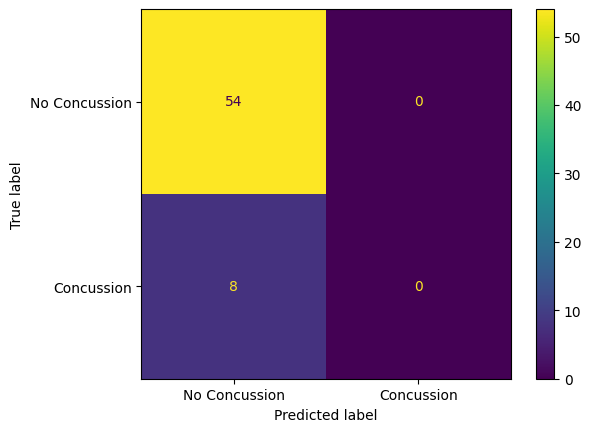

              precision    recall  f1-score   support

           0       0.87      1.00      0.93        54
           1       0.00      0.00      0.00         8

    accuracy                           0.87        62
   macro avg       0.44      0.50      0.47        62
weighted avg       0.76      0.87      0.81        62



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:


actual = y_test
predicted = y_pred

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['No Concussion', 'Concussion'])

cm_display.plot()
plt.show()


print(classification_report(y_test, y_pred))

Due to an imbalance in our dataset (more non concussions then concussions) and such a small number of datapoints, our testing set is only 62 datapoints (20% of dataset). This includes 54 players who do not have concussions, and 8 players who do have concussions during a season.

As we can see, the confusion matrix shows that the model predicts all 62 players in the testing set to be non concussions. The model is "playing it safe" by predicting all the players to be non concussions. This works well and actually achieves an 87% accuracy! However although the model may be accurate, its not doing a good job at predicting when a player will have a concussion or not (as it is not predicting any player to have a concussion!).

This shows us that although our model may look like it is doing a good job and be accurate, it is not actually doing its intended purpose; to predict concussions.

### Decision Tree Classifier

Accuracy: 0.8709677419354839


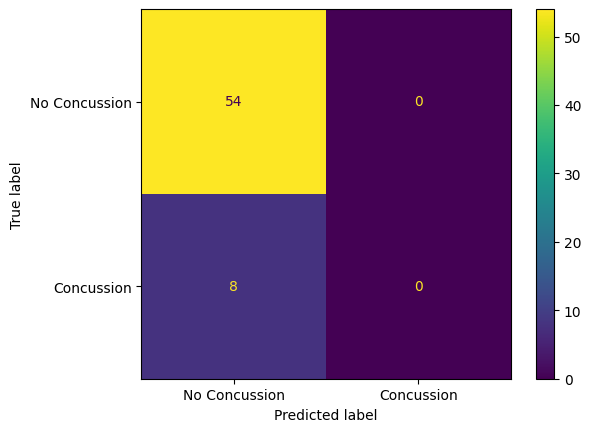

              precision    recall  f1-score   support

           0       0.87      1.00      0.93        54
           1       0.00      0.00      0.00         8

    accuracy                           0.87        62
   macro avg       0.44      0.50      0.47        62
weighted avg       0.76      0.87      0.81        62



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth=5)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

actual = y_test
predicted = y_pred

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['No Concussion', 'Concussion'])

cm_display.plot()
plt.show()


print(classification_report(y_test, y_pred))

The decision tree classifier also recieved an 87% accuracy (same as logistic regression). Looking at the confusion matrix, the Decision Tree Classifier faces the same issue as the logistic regression; predicting all the players to have a non concussion.

Lets see what this looks like in a diagram:

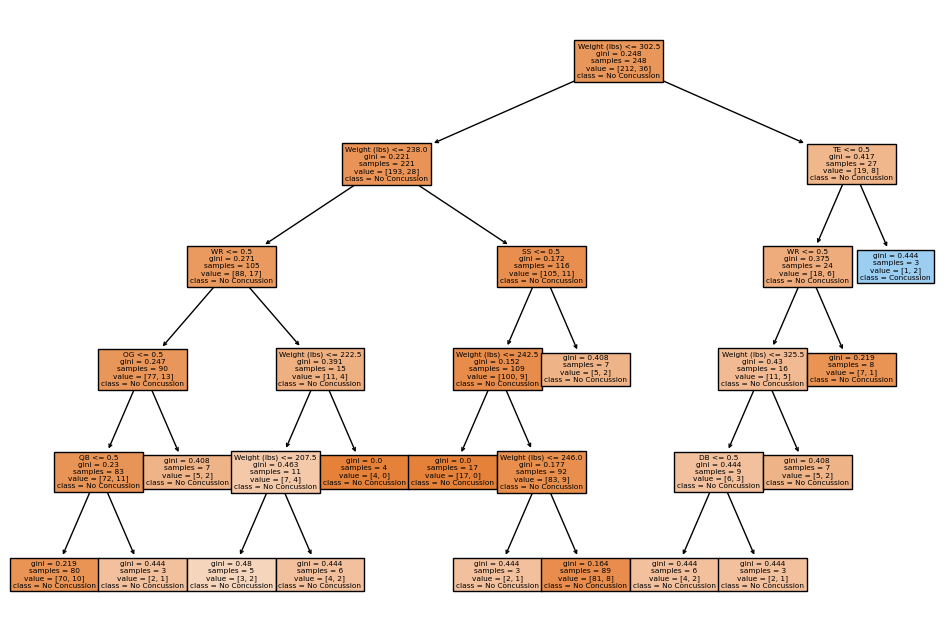

In [ ]:
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=X.columns, class_names=['No Concussion', 'Concussion'], filled=True)
plt.show()

Above is a decision tree diagram with a max depth of 5. The model started at 302.5 lbs as the first node. As we can see when the player is greater than 302.5 lbs and is lower than 308 lbs, the model predicts the player to have a concussion during the given season. This is the only time the model predicts a concussion with the max depth set to 5. The reason why the model predicts a concussion here is due to 3 datapoints in our dataset: 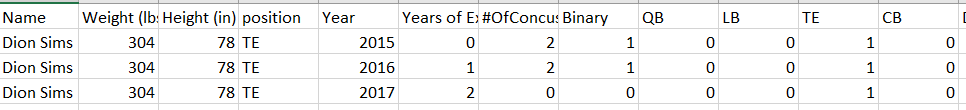

As we can see, there is only 1 player in our dataset that is between 302.5 and 308 lbs. This player is Dion Sims, who is coming in at a solid 304 lbs and is a TE (his position is a tight end). This player has recieved a concussions in 2 of his years playing, and 0 in the other. This is 66% of seasons recieving a concusion. Therefore the model is overfitting, and predicting as this is the only player in that range, and any other player in that range is predicted to follow the probability of Dion Sims getting a concussion.

This is an overfitting issue, and can be solved with more data and cleaner data.

The model predicts all the rest of the nodes to be non concussions. This is similarly due to the imbalance in our datapoints (as majority are non concussions), and can be solved by having an approximately equal amount of data points in each class (~50% in concussions, ~50% non concussions), having more and cleaner data, and having better features that have more correlation to the target of having a concussion or not.

# Conclusions
### <u>Summarized Findings</u>
First, we looked at the linear **regression model**:
*  The Linear Regression model achieved a low R-squared value of 0.014115825113258484, indicating that only 1.4% of the variance in the target variable (Number of concussions) is explained by the independent variables (features) defined in the model.
*  The Mean Squared Error (MSE) for the Linear Regression model was 0.31831555533034595, which indicates the average squared error between the predicted and actual values of the target variable. A lower MSE value would indicate better model performance, but the MSE value in this case is still relatively high.


*  The Residuals plot for the Linear Regression model suggests that the model's predictions are mainly centered around 0, but due to the imbalanced distribution of 0 values in the target variable, the residuals are also concentrated around 0. This may indicate that the model is not accurately predicting cases where the actual Number of concussions is not 0.


*  Overall, the Linear Regression model does not seem to be performing well in explaining the variation in the Number of concussions, as indicated by the low R-squared value and relatively high MSE.


Next, we looked at the **Random Forest Regression model**:


*  The Random Forest Regression model achieved a negative R-squared value of -0.2562264889028105, indicating that the model is performing worse than simply predicting the mean Number of concussions in the dataset. This suggests that the independent variables used in the model are not explaining the target variable well.


*  The Mean Squared Error (MSE) for the Random Forest Regression model was 0.4056018370329625, which indicates the average squared error between the predicted and actual values of the target variable. While the MSE is lower compared to the Linear Regression model, the negative R-squared value suggests that the model is not performing well.


*  Based on these findings, it appears that the Random Forest Regression model is not a good fit for predicting the Number of concussions in NFL players in this dataset.


Then, we looked at the **Gradient Boosting Regression model**:


*  The Mean squared error (MSE) for the Gradient Boosting Regression model is 0.3395531652554759: This means that on average, the predicted number of concussions from the Gradient Boosting Regression model is off by 0.3396 units squared.
*  The R-squared value for the Gradient Boosting Regression model is also negative, specifically -0.051661115997502005: This indicates that the features used in the Gradient Boosting Regression model do not explain the variability in the target variable well, and the model performs worse than simply predicting the mean number of concussions in the dataset.


*  The model performs worse than predicting the mean number of concussions in the dataset: This implies that the Gradient Boosting Regression model is not effective in predicting the number of concussions and performs worse than a basic model that predicts the mean number of concussions in the dataset.


*  Based on these findings, it appears that the Gradient Boosting Regression model is not a good fit for predicting the Number of concussions in NFL players in this dataset.


Next, we looked at the **Logistic Regression model**:


*  The model achieves an 87% accuracy: This indicates that the model is able to correctly predict the outcome (concussion or non-concussion) for 87% of the cases in the testing set. However, accuracy alone does not fully explain how well our model is performing: While accuracy is a commonly used metric, we learned that it may not be sufficient to evaluate the effectiveness of a model in certain cases.


*  The confusion matrix shows that all players in the testing set are predicted as non-concussions: This suggests that the model is "playing it safe" and predicting all players to be non-concussions, resulting in a high accuracy.


*  The model's actual purpose is to predict concussions, but it fails to do so: Despite the high accuracy, the model is not effectively predicting concussions, as it is not predicting any player to have a concussion in the testing set.


Finally, we looked at the **Decision Tree Classifier**:


*   The model achieves an 87% accuracy: This indicates that the model is able to correctly predict the outcome (concussion or non-concussion) for 87% of the cases in the testing set. This is the same accuaracy as the logistic regression, and as we can see from the confusion matrix, the decision tree classifier faces the same issues and predicts all players to be non concussions.

*   Looking at the decision tree diagram, the model does have a prediction for a concussion in the weight range of 302.5 to 308 lb TE. However this is based on only 1 player in the dataset: Dion Sims, a tight end who weighs 304 lbs and has a history of concussions in 2 out of his 3 playing years.

*   This suggests that the model may be overfitting, as it is predicting based on a small number of data points: The model is assuming that any other player in this weight range will follow the same probability of getting a concussion as Dion Sims, which may not be accurate.

*   Overfitting can be addressed by having more data and cleaner data: Increasing the dataset size, balancing the number of data points in each class, and ensuring data quality can help mitigate overfitting issues.

*   The model predicts all other nodes to be non-concussions: This may be due to the imbalance in the dataset, where the majority of data points are non-concussions.



<br>

In summary, our findings and learnings from these models indicate that none of the models performed well in predicting the Number of concussions in NFL players based on the features used in the dataset. The linear regression model had a low R-squared value and relatively high MSE, indicating poor performance. The Random Forest Regression and Gradient Boosting Regression models both had negative R-squared values, suggesting they performed worse than simply predicting the mean. The logistic regression model had high accuracy but failed to effectively predict concussions, as it predicted all players as non-concussions. The decision tree classifier showed signs of overfitting and relied heavily on a small number of data points for prediction. Overall, these models need further improvement, such as increasing dataset size, balancing data points, and ensuring data quality, to enhance their predictive performance for concussions in NFL players. We have also seen that the features we have selected are not the best in terms of correlation to concussions. Having stronger correlated features to number of concussions and probability of a concussion during an NFL season would improve our models for the purpose of predicting player injury.

<br>

### <u>Real World Implications</u>
*   Our analysis suggests that the models we used didn't do a good job of predicting the number of concussions in NFL players. The models had low accuracy in explaining how many concussions players would have, and some of them made inaccurate predictions. This means that the current models may not be reliable in real-world situations, and we need more research to develop better ways of predicting concussions in football players to help prevent these injuries.

*   This has also showed us that NFL player injury is a very difficult thing to predict. There is a high degree of randomness that comes into play with sports injury, and having a machine learning model to utilize all the intricacies and factors that come with injury is near impossible. However if models like this can predict injury, they can be very useful in increasing the career span of players by preventing injury. Especially with brain trauma related injury like concussions, in which we see a high degree of NFL players face CTE and other brain trauma syndromes during and after their careers.

<br>

### <u>'Machine Learnings' From Our Project</u>
*   Data quality matters a lot: This project solidified our understanding that the quality of the data used to train machine learning models is crucial. If the data is incomplete, inaccurate, or biased, it can significantly impact the performance of the model. It's important to use clean, diverse, and representative data for training to ensure reliable results.

*   Machine learning models can sometimes be overly cautious and unwilling to take risks during training due to bias in data and less data points to build confidence on. This can have implications in real-world applications where exploring options or taking risks is necessary, such as injury prediction in sports. As practitioners, it's important to be aware of this behavior and consider the balance between risk aversion and exploration in model training to ensure optimal performance.

<br>

### <u>Next Steps / Suggestions</u>

Going forward, there are some valuable next steps that can help this model succeed:
*   Collect more data:
Increasing the size and diversity of the dataset used for training the model can help improve its accuracy and generalization capability. This can be utilizing more years of data, going further back from 2010 NFL data to previous years

*   Cleaner data:
High-quality data with minimal noise, errors and inconsistencies can significantly improve the performance of our model because it means that each data point is meaningful and helpful for predicting our target variable - # of concussions.
Ensuring data integrity through data cleaning, preprocessing and validation is crucial for improving the accuracy and reliability of our model.

*   Balancing the data:
in binary classification, having the same number of data points for each class (~50% for non concussions, ~50% for concussions). This will allow the classification models to predict either of the two classes, and not just predict 1 of them for every data point (like we saw them doing in our classification models, by only predicting non concussion).
Outlining what we are predicting better:
number of concussions is not great to predict as there is such a small integer range of what that value can be: basically just 0, 1, 2, or 3 as a player. Instead, we can predict whether a player got a concussion or not as a better target. That was the target for the classification models, therefore going forward that would be a better approach to predict concussions overall.

*   Features:
The features we outlined are not strongly correlatated to concussion risk. Finding new features that are more strongly correlated to number of concussions and probability of a concussion would improve our models to predicting NFL player injury. This can also involve engineering new features, which can be aggregating our data into metrics, or combining multiple features into 1 that captures a higher correlation

#Bibliography

Source for Injury data:

“Football Transactions Search Results.” Pro Sports Transactions, https://www.prosportstransactions.com/football/Search/SearchResults.php?Player=&amp;Team=&amp;BeginDate=&amp;EndDate=&amp;InjuriesChkBx=yes&amp;submit=Search&amp;start=3975.

Source for player details:

KendallGillies. “NFL Statistics.” Kaggle, 9 June 2017, https://www.kaggle.com/datasets/kendallgillies/nflstatistics?resource=download.